# Lab 20 - Total Variation and Image Processing
### Lehner White

In [1]:
from __future__ import division
from numpy.random import random_integers, uniform, randn
from matplotlib import cm
from scipy.misc import imread, imsave
import numpy as np
from matplotlib import pyplot as plt

## Problem 1:

Difference in iterations is  0.0
Final time =  0.2


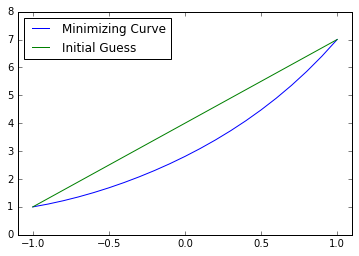

In [2]:
a, b = -1, 1.
alpha, beta = 1., 7.

#### Define variables x_steps, final_T, time_steps ####
x_steps, final_T, time_steps = 20, 0.2, 250 
delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)

# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print "stability condition fails"
u = np.empty((2,x_steps+1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

print "Difference in iterations is ", np.linalg.norm(np.abs((u[0] - u[1])))
print "Final time = ", iteration*delta_t

plt.plot(x0, u[1], label='Minimizing Curve')
plt.plot(x0, np.linspace(alpha, beta, x_steps+1), label='Initial Guess')
plt.xlim(-1.1, 1.1)
plt.ylim(0, 8)
plt.legend(loc='best')
plt.show()

## Problem 2:

/Users/Lehner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
/Users/Lehner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead


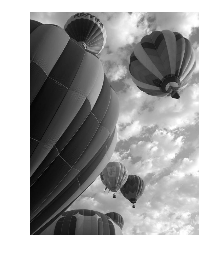

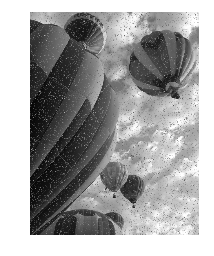

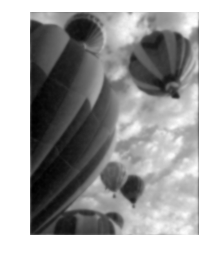

In [3]:
imagename = 'balloons_resized_bw.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, flatten=True) * (1. / 255)
orig = IM.copy()
IM_x, IM_y = IM.shape

for lost in xrange(changed_pixels):
    x_,y_ = random_integers(1,IM_x-2), random_integers(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)

time_steps = 250
delta_t, delta_x, delta_y, lamb = 1e-3, 1, 1, 40
final_T = delta_t * time_steps
a, b = -1, 1.
alpha, beta = 1., 7.

# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print "stability condition fails"

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

u = IM.copy()

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    uxx = (np.roll(u,-1, axis = 1) - 2 * u + np.roll(u,1,axis = 1)) / delta_x**2
    uyy = (np.roll(u,-1, axis = 0) - 2 * u + np.roll(u,1,axis = 0)) / delta_y**2
    ut = -(u - IM - lamb * (uxx + uyy))
    u = ut * delta_t + u
    iteration+=1

plt.imshow(orig, cmap=cm.gray)
plt.axis('off')
plt.show()
plt.imshow(IM, cmap=cm.gray)
plt.axis('off')
plt.show()
plt.imshow(u, cmap=cm.gray)
plt.axis('off')
plt.show()

/Users/Lehner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
/Users/Lehner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead


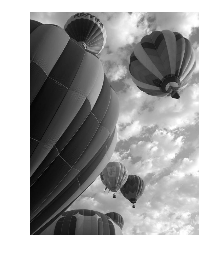

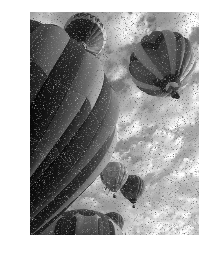

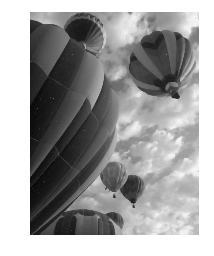

In [4]:
imagename = 'balloons_resized_bw.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, flatten=True) * (1. / 255)
orig = IM.copy()
IM_x, IM_y = IM.shape

for lost in xrange(changed_pixels):
    x_,y_ = random_integers(1,IM_x-2), random_integers(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)

time_steps = 200
delta_t, delta_x, delta_y, lamb = 1e-3, 1, 1, 1
final_T = delta_t * time_steps
a, b = -1, 1.
alpha, beta = 1., 7.

# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print "stability condition fails"

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

u = IM.copy()

# Time step until successive iterations are close
iteration = 0
eps = 1e-4
while iteration < time_steps:
    ux = (np.roll(u,-1,axis = 1) - np.roll(u, 1, axis = 1))/ 2.
    uy = (np.roll(u,-1,axis = 0) - np.roll(u, 1, axis = 0))/ 2.
    uxx = (np.roll(u,-1, axis = 1) - 2 * u + np.roll(u,1,axis = 1)) / delta_x**2
    uyy = (np.roll(u,-1, axis = 0) - 2 * u + np.roll(u,1,axis = 0)) / delta_y**2
    uxy = (np.roll(ux, -1, axis = 0) - np.roll(ux, 1, axis = 0)) / 2.
    ut = -lamb * (u - IM) + (uxx * uy**2 + uyy * ux**2 - 2*ux*uy*uxy)/((eps + ux**2 + uy**2)**(3./2))
    u = ut * delta_t + u.copy()
    iteration+=1

plt.imshow(orig, cmap=cm.gray)
plt.axis('off')
plt.show()
plt.imshow(IM, cmap=cm.gray)
plt.axis('off')
plt.show()
plt.imshow(u, cmap=cm.gray)
plt.axis('off')
plt.show()